In [1]:
# Import necessary libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb
import random
import array
import statistics 
import statsmodels.api as sm
# Mann Kendall Library
import pymannkendall as mk

In [2]:
#new excel sheet here 
#EVERYTHING SAYS CDD BUT NOW ITS ACTUALLY TEMPERATURE 


cp_data = pd.read_excel('final_ida_analysis_data_wmodels.xlsx',sheet_name= "History-present")
Years = cp_data["Year"]
AMWSR   = cp_data["NEW Annual Maximum Warm Season Hourly Rainfall (inches/hour)"]
CDD_degC = cp_data['Warm Season Average Temperature (C)']



cdd_proj=pd.read_excel('final_ida_analysis_data_wmodels.xlsx',sheet_name= "present-future (avt)",skiprows=1)
#CDD_projected_low_degC=cdd_proj["low1"]
#CDD_projected_high_degC=cdd_proj["high1"]
CDD_years_future=cdd_proj['Year']

cdd_proj

model_names=['GFDL CM4 c96','MPI','CESM2','CM4C192:High Res MIP']

#

In [3]:
cdd_proj

,Year,CDD-Degrees F-adjusted low emission,Unnamed: 2,low1,high1,low2,high2,low3,high3,low4
0,2023,NaN,9.0,39.637177,39.362140,39.749580,38.671974,39.245730,39.669353,39.021263
1,2024,NaN,10.0,39.457558,39.054115,38.723440,38.655624,40.099820,39.793697,39.931240
2,2025,NaN,11.0,38.670770,39.361176,39.325550,38.663860,39.716010,38.813200,39.893220
3,2026,NaN,12.0,40.094654,40.349304,39.372128,40.660600,39.755447,39.593140,39.404980
4,2027,NaN,13.0,38.912060,39.217440,39.309746,39.790060,40.070435,39.696163,39.816750
...,...,...,...,...,...,...,...,...,...,...
73,2096,NaN,NaN,NaN,NaN,39.362280,42.949870,40.668137,42.840050,NaN
74,2097,NaN,NaN,NaN,NaN,39.972763,41.915120,40.491710,43.130867,NaN
75,2098,NaN,NaN,NaN,NaN,39.774643,42.252410,40.315964,43.108932,NaN
76,2099,NaN,NaN,NaN,NaN,38.402690,42.930550,40.302452,44.316170,NaN


In [4]:
low1=cdd_proj["low1"]
high1=cdd_proj["high1"]
low2=cdd_proj["low2"]
high2=cdd_proj["high2"]
low3=cdd_proj["low3"]
high3=cdd_proj["high3"]

In [5]:
import pathlib
#from pathlib import path

#this line takes care of the rpy package later on, and the "unable to initalize the JIT fatal error" 
import os

os.environ['R_HOME'] = r"C:\Users\carol\miniforge3\envs\pyro_env\Lib\R"


In [6]:
# rpy2 for accessing R 
r_files = ['.RData', '.RHistory', '.RProfile']
for rf in r_files:
    p = pathlib.Path.cwd() / rf
    try:
        p.rename(p.with_suffix('.ignore'))
    except FileNotFoundError:
        pass

import rpy2

for rf in r_files:
    p = pathlib.Path.cwd() / rf
    p = p.with_suffix('.ignore')
    try:
        p.rename(p.with_suffix(''))
    except FileNotFoundError:
        pass

In [7]:
import lmoments3

In [8]:
#this is the workaround to stop the memory error 

r_files = ['.RData', '.RHistory', '.RProfile']
for rf in r_files:
    p = pathlib.Path.cwd() / rf
    try:
        p.rename(p.with_suffix('.ignore'))
    except FileNotFoundError:
        pass
import rpy2
from rpy2 import robjects
for rf in r_files:
    p = pathlib.Path.cwd() / rf
    p = p.with_suffix('.ignore')
    try:
        p.rename(p.with_suffix(''))
    except FileNotFoundError:
        pass

In [9]:
import climextremes

R[write to console]: Loading required package: usethis



Current version: 0.3.1 does not match requested version: 0.3.1rc1. Attempting installation of R climextRemes package (this may take a few minutes) ...


R[write to console]: WARNING: Rtools is required to build R packages, but is not currently installed.

Please download and install Rtools 4.0 from https://cran.r-project.org/bin/windows/Rtools/.

R[write to console]: Error in parse_deps(paste(spec, collapse = ", ")) : 
  Invalid comparison operator in dependency: p(0.3.1rc1)

R[write to console]: WARNING: Rtools is required to build R packages, but is not currently installed.

Please download and install Rtools 4.0 from https://cran.r-project.org/bin/windows/Rtools/.

R[write to console]: Warning:
R[write to console]:  unable to access index for repository https://cran.cnr.berkeley.edu/src/contrib:
  cannot open URL 'https://cran.cnr.berkeley.edu/src/contrib/PACKAGES'

R[write to console]: Error in download_version_url(package, version, repos, type) : 
  couldn't find package 'climextRemes'



Installation of R climextRemes version: 0.3.1rc1 failed (likely because the version is not on the CRAN R package archive).
Falling back to installed version.


In [10]:
%load_ext rpy2.ipython

C:\Users\carol\miniforge3\envs\pyro_env\Lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


In [11]:
df=pd.DataFrame(data={'CDD':CDD_degC})
df['CDD']=df
df['Years']=Years[75]

In [12]:
%%R -i df
#calculate lowess thru R
Years_historical =  seq(1948, 2023, 1)
p = df$CDD

lp = lowess(Years_historical ,p)

In [13]:
lp = %R lp
lp = pd.DataFrame(lp)

In [14]:
ddd=['Historical Observations','Lowess','GFDL-ESM4.1-SSP126','GFDL-ESM4.1-SSP370','MPI-ESM1-2-HR-SSP126','MPI-ESM1-2-HR-SSP370','CESM2-SSP126','CESM2-SSP370']

Text(0.5, 0, 'Years')

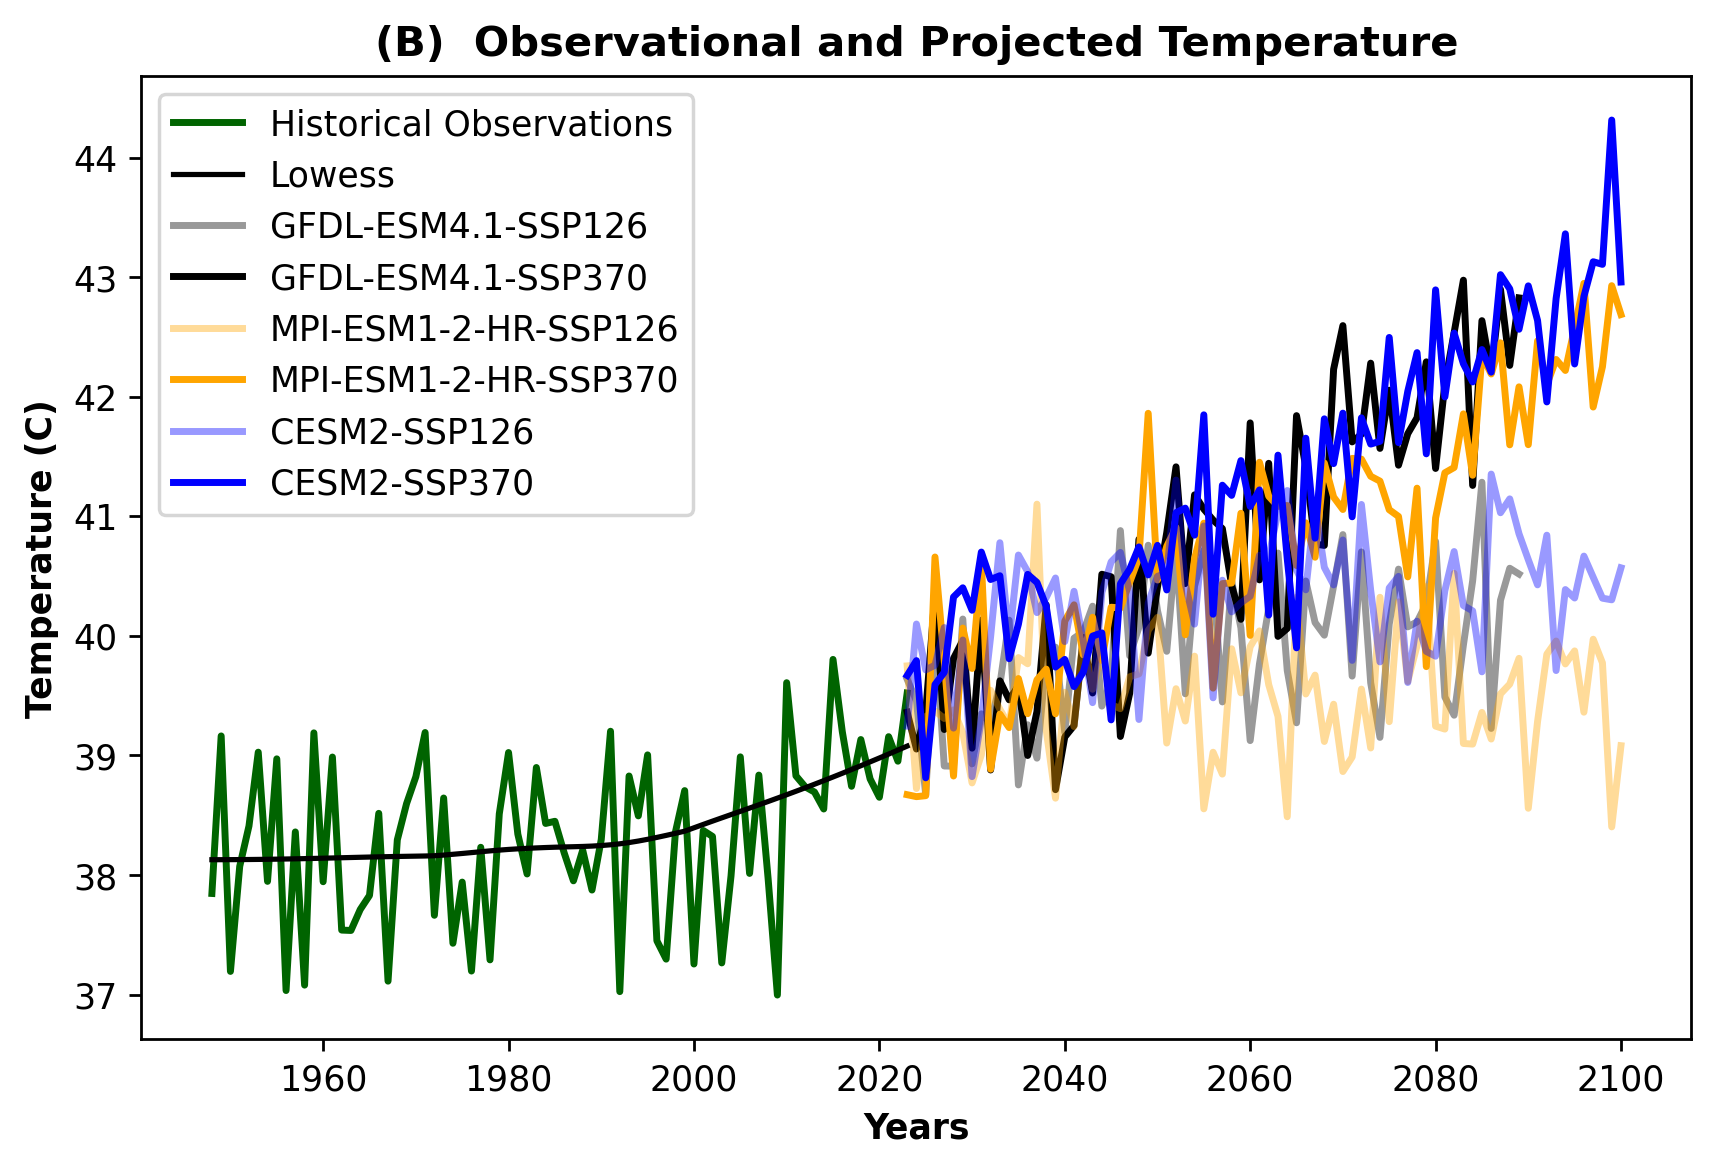

In [15]:
clrlist=['black','black','orange','orange','blue','blue','green']
fig, ax = plt.subplots(figsize=(8,5),dpi=250)
yr=[10,25,50]
for ll in range(7):
    if ll == 0:
        plt.plot(Years,CDD_degC,linestyle='solid',color='darkgreen',linewidth=2)
        plt.plot(lp['x'],lp['y'],'k')
    if ll == 1:
        plt.plot(CDD_years_future,low1,linestyle='solid',color=clrlist[0],linewidth=2,alpha=0.4)
        #plt.plot(CDD_years_future,low1,linestyle='solid',color=clrlist[3],linewidth=1)
    if ll == 2:
        plt.plot(CDD_years_future,high1,linestyle='solid',color=clrlist[1],linewidth=2,alpha=1)
    if ll == 3:
        plt.plot(CDD_years_future,low2,linestyle='solid',color=clrlist[2],linewidth=2,alpha=0.4)
    if ll == 4:
        plt.plot(CDD_years_future,high2,linestyle='solid',color=clrlist[3],linewidth=2,alpha=1)
    if ll == 5:
        plt.plot(CDD_years_future,low3,linestyle='solid',color=clrlist[4],linewidth=2,alpha=0.4)
    if ll == 6:
        plt.plot(CDD_years_future,high3,linestyle='solid',color=clrlist[5],linewidth=2,alpha=1)
plt.legend(ddd)  #plt.scatter(yr,dd[ll][1:4])
# plt.plot([2033,2034],[0,1800],'--k')
# plt.plot([2048,2049],[0,1800],'--k')
# plt.plot([2073,2074],[0,1800],'--k')
# plt.plot([2023,2023],[0,1800],'--k')
# #plt.text(2005,1660,'Planning')
#plt.text(2005,1600,'Phase:')
# plt.text(2008,1600,'Present')
# plt.text(2023,1600,'10 yr')
# plt.text(2038,1600,'25 yr')
# plt.text(2063,1600,'50 yr')
#plt.ylim([400,1720])

#plt.text(1955,1000,'Historical Period Mann-Kendall Sen's Slope')
# plt.text(1957,1000,'Historical Period')
# plt.text(1950,950,'Mann-Kendall Sens Slope:')
# plt.text(1943,900,'13.07 Cooling Degrees per decade')

plt.title('(B)  Observational and Projected Temperature',weight='bold')
plt.ylabel('Temperature (C)',weight='bold')
plt.xlabel('Years',weight='bold')


In [ ]:
fig, ax = plt.subplots(figsize=(8,5),dpi=250)
x_num = CDD_degC
vec=AMWSR
trend = np.polyfit(x_num, vec, 1)
fit = np.poly1d(trend)
x_fit = np.linspace(x_num.min(), x_num.max())
plt.plot(x_fit, fit(x_fit), "r--", linewidth=3)

#plt.plot(Years,CDD,color='k')
plt.scatter(x_num,vec,color='k',marker='o')
#p = sb.histplot(AMR, kde=True)
plt.title('')
plt.ylabel('Annual Maximum Hourly Rainfall(inches/hr)',weight='bold')
plt.xlabel('Temperature (C)',weight='bold')

#plt.setp(ax.get_xticklabels(), fontsize=10,weight='bold')
#plt.setp(ax.get_yticklabels(), fontsize=10,weight='bold')

#sl=round(kk.slope,4)
#intc=round(kk.intercept,3)
#lab=('MK sens slope: '+str(sl)+' Intercept: '+str(intc))

plt.title('(A)  Observational Temperature vs. R',weight='bold')
#plt.text(1955,700,lab)

plt.show()

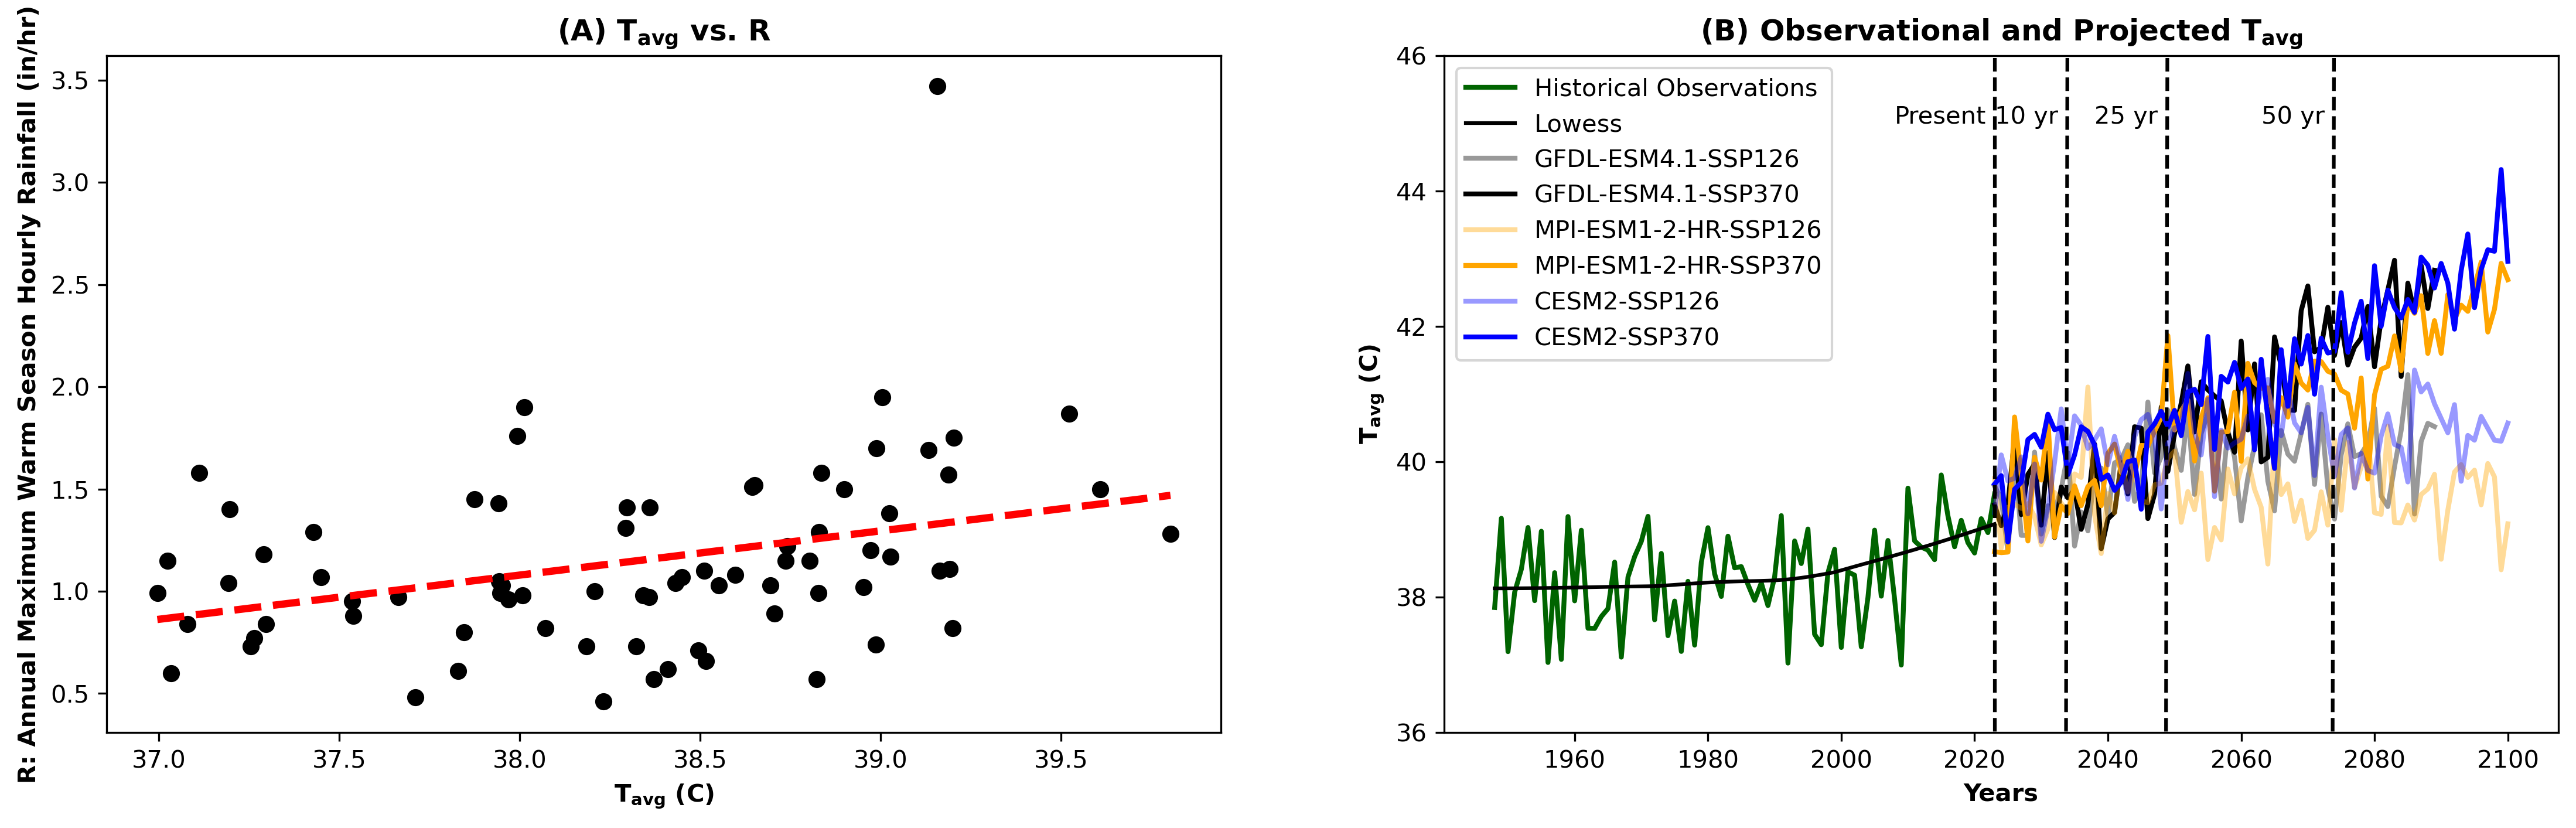

In [17]:
#combine both and save as fig  

#clrlist=['green','olive','red','crimson','blue','mediumslateblue','black']
clrlist=['black','black','orange','orange','blue','blue','green']
fig, (ax2,ax1) = plt.subplots(1,2,figsize=(18,5),dpi=300)
yr=[10,25,50]
for ll in range(7):
    if ll == 0:
        ax1.plot(Years,CDD_degC,linestyle='solid',color='darkgreen',linewidth=2)
        ax1.plot(lp['x'],lp['y'],'k')
    if ll == 1:
        ax1.plot(CDD_years_future,low1,linestyle='solid',color=clrlist[0],linewidth=2,alpha=0.4)
        #plt.plot(CDD_years_future,low1,linestyle='solid',color=clrlist[3],linewidth=1)
    if ll == 2:
        ax1.plot(CDD_years_future,high1,linestyle='solid',color=clrlist[1],linewidth=2,alpha=1)
    if ll == 3:
        ax1.plot(CDD_years_future,low2,linestyle='solid',color=clrlist[2],linewidth=2,alpha=0.4)
    if ll == 4:
        ax1.plot(CDD_years_future,high2,linestyle='solid',color=clrlist[3],linewidth=2,alpha=1)
    if ll == 5:
        ax1.plot(CDD_years_future,low3,linestyle='solid',color=clrlist[4],linewidth=2,alpha=0.4)
    if ll == 6:
        ax1.plot(CDD_years_future,high3,linestyle='solid',color=clrlist[5],linewidth=2,alpha=1)
ax1.legend(ddd)  #plt.scatter(yr,dd[ll][1:4])
ax1.plot([2033,2034],[0,50],'--k')
ax1.plot([2048,2049],[0,50],'--k')
ax1.plot([2073,2074],[0,50],'--k')
ax1.plot([2023,2023],[0,50],'--k')
#plt.text(2005,1660,'Planning')
#plt.text(2005,1600,'Phase:')
ax1.text(2008,45,'Present')
ax1.text(2023,45,'10 yr')
ax1.text(2038,45,'25 yr')
ax1.text(2063,45,'50 yr')
ax1.set_ylim([36,46])

#plt.text(1955,1000,'Historical Period Mann-Kendall Sen's Slope')
#ax1.text(1957,1000,'Historical Period')
#ax1.text(1950,950,'Mann-Kendall Sens Slope:')
#plt.text(1943,900,'13.07 Cooling Degrees per decade')

ax1.set_title(r'(B) Observational and Projected $\mathbf{T}_{\mathbf{avg}}$',weight='bold')
ax1.set_ylabel(r'$\mathbf{T}_{\mathbf{avg}}$ (C)',weight='bold')
ax1.set_xlabel('Years',weight='bold')

#
x_num = CDD_degC
vec=AMWSR
trend = np.polyfit(x_num, vec, 1)
fit = np.poly1d(trend)
x_fit = np.linspace(x_num.min(), x_num.max())
ax2.plot(x_fit, fit(x_fit), "r--", linewidth=3)

#plt.plot(Years,CDD,color='k')
ax2.scatter(x_num,vec,color='k',marker='o')
#p = sb.histplot(AMR, kde=True)a
#ax2.set_title('')
ax2.set_ylabel('R: Annual Maximum Warm Season Hourly Rainfall (in/hr)',weight='bold')
ax2.set_xlabel(r'$\mathbf{T}_{\mathbf{avg}}$ (C)',weight='bold')

#plt.setp(ax.get_xticklabels(), fontsize=10,weight='bold')
#plt.setp(ax.get_yticklabels(), fontsize=10,weight='bold')

#sl=round(kk.slope,4)
#intc=round(kk.intercept,3)
#lab=('MK sens slope: '+str(sl)+' Intercept: '+str(intc))

ax2.set_title(r'(A) $\mathbf{T}_{\mathbf{avg}}$ vs. R',weight='bold')
plt.savefig("Fig_r2_3ab.jpg")